In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import sys
sys.path.insert(0, '/Users/anup.sethuram/DEV/LM/EanS/ml30/ml30/ml-ng/C2/W1/utils')

from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


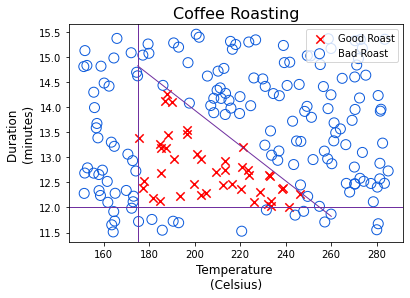

In [4]:
plt_roast(X,Y)

In [9]:


print(f"Temperature Max, Min pre normalization: {np.max(X[:, 0]) :0.2f},  {np.min(X[:, 0]) :0.2f}")
print(f"Duration Max, Min pre normalization: {np.max(X[:, 1]) :0.2f},  {np.min(X[:, 1]) :0.2f}")

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X) #learns mean and variance
Xn = norm_l(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99,  151.32
Duration Max, Min pre normalization: 15.45,  11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [10]:
Xt = np.tile(Xn, (1000,1))
Yt = np.tile(Y, (1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [12]:
tf.random.set_seed(1234) # to obtain consistent results.
model = Sequential(
    [    
        tf.keras.Input(shape=(2,)), # can be avoided, useful for exploring tensorflow models.
        Dense(units=3, activation='sigmoid', name='layer1'),
        Dense(units=1, activation='sigmoid', name='layer2')
    ]

)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [14]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [15]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08 -0.3   0.18]
 [-0.56 -0.15  0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.43]
 [-0.88]
 [ 0.36]] 
b2(1,): [0.]


In [17]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

)

model.fit(
    Xt, Yt,
    epochs=10
)

Epoch 1/10
6250/6250 [==============================] - 5s 767us/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 5s 747us/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 5s 777us/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 5s 748us/step - loss: 0.0160
Epoch 5/10
6250/6250 [==============================] - 5s 758us/step - loss: 0.0104
Epoch 6/10
6250/6250 [==============================] - 5s 754us/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 5s 745us/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 5s 878us/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 5s 843us/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 5s 757us/step - loss: 0.0020


In [18]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.13  14.3  -11.1 ]
 [ -8.92  11.85  -0.25]] 
b1: [-11.16   1.76 -12.1 ]
W2:
 [[-45.71]
 [-42.95]
 [-50.19]] 
b2: [26.14]


In [19]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [20]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

X_testn = norm_l(X_test) # Normalize the test samples too..
 
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 77ms/step
predictions = 
 [[9.63e-01]
 [3.03e-08]]


array([[0.],
       [0.]], dtype=float32)

In [29]:
yhat = (predictions >= 0.5).astype(int)
yhat

array([[1],
       [0]])

In [30]:
# Layer functions

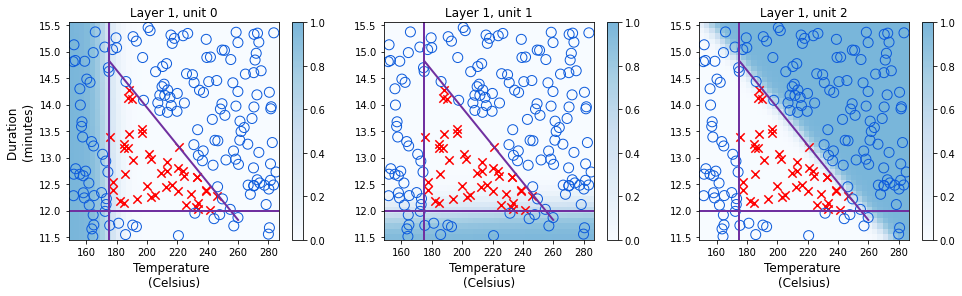

In [31]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

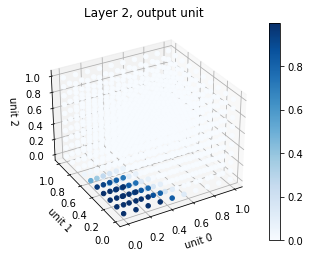

In [32]:
plt_output_unit(W2,b2)

7/7 [==============================] - 0s 983us/step


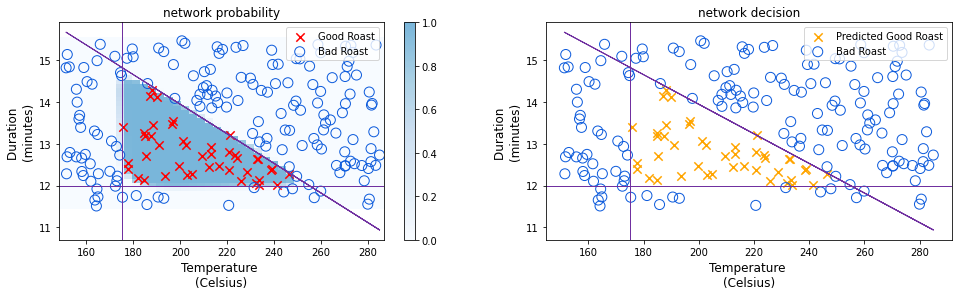

In [33]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)